In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('card_transdata.csv')

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


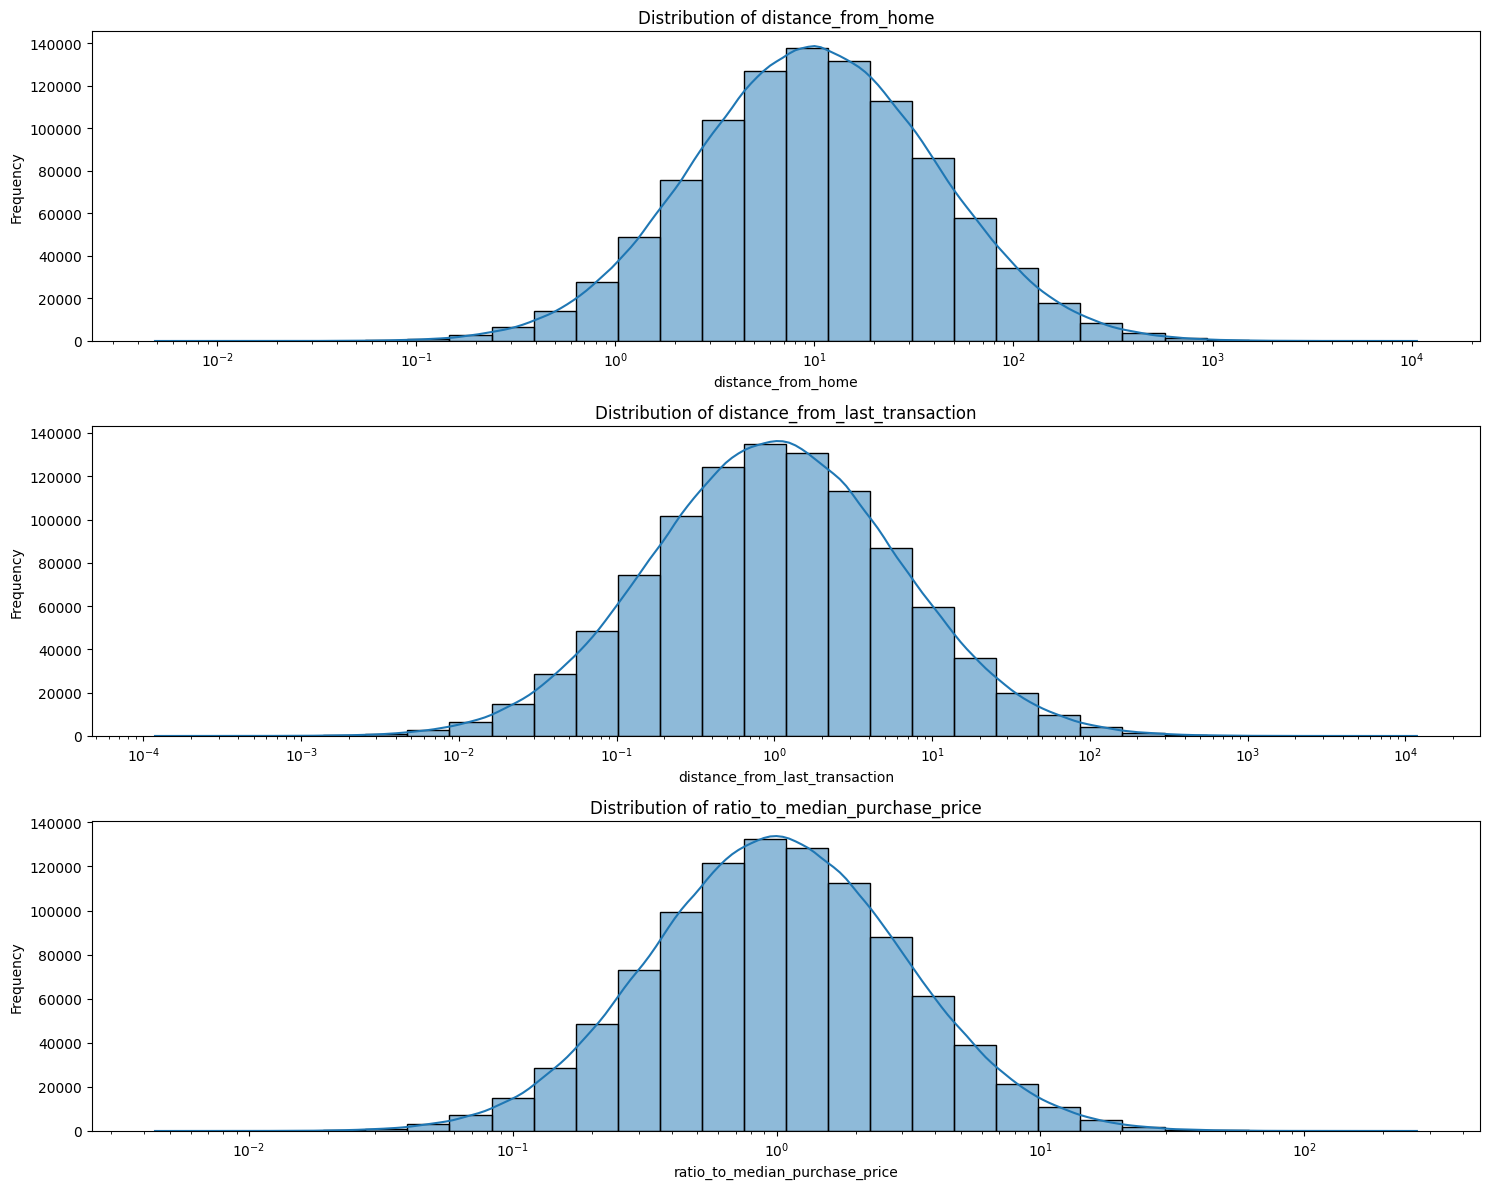

In [6]:
plt.figure(figsize=(15, 12))
continuous_features = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

for i, feature in enumerate(continuous_features, 1):
    plt.subplot(3, 1, i)
    sns.histplot(df[feature], bins=30,log_scale=True, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


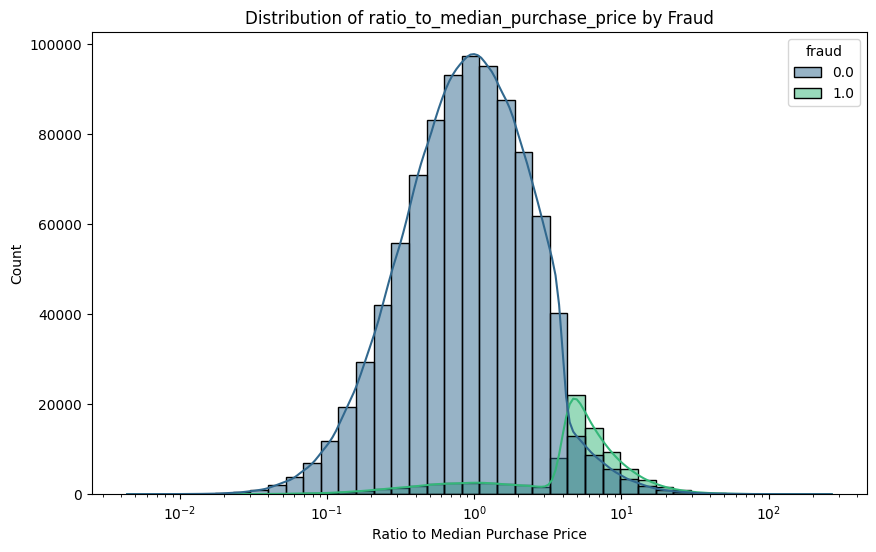

In [7]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='ratio_to_median_purchase_price', hue='fraud', log_scale=True, bins=40,kde=True, palette='viridis')
plt.title('Distribution of ratio_to_median_purchase_price by Fraud')
plt.xlabel('Ratio to Median Purchase Price')
plt.ylabel('Count')
plt.show()


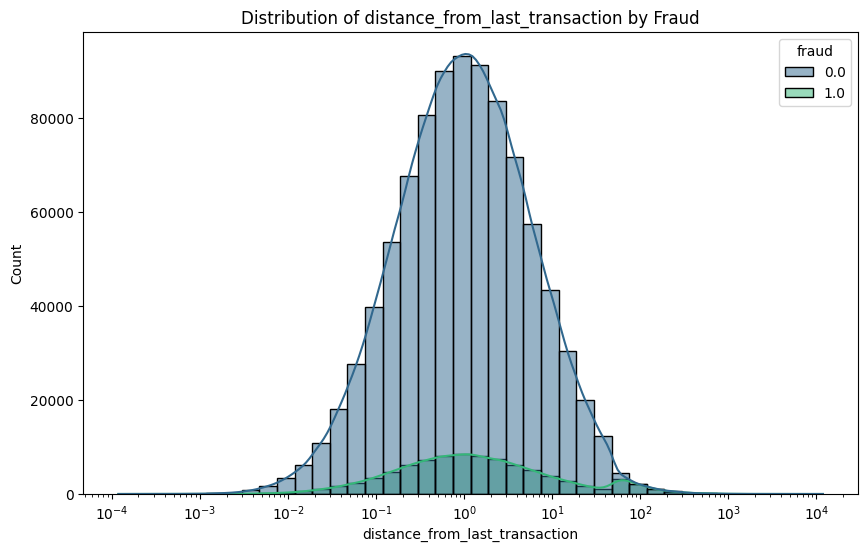

In [8]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='distance_from_last_transaction', hue='fraud', log_scale=True, bins=40,kde=True, palette='viridis')
plt.title('Distribution of distance_from_last_transaction by Fraud')
plt.xlabel('distance_from_last_transaction')
plt.ylabel('Count')
plt.show()

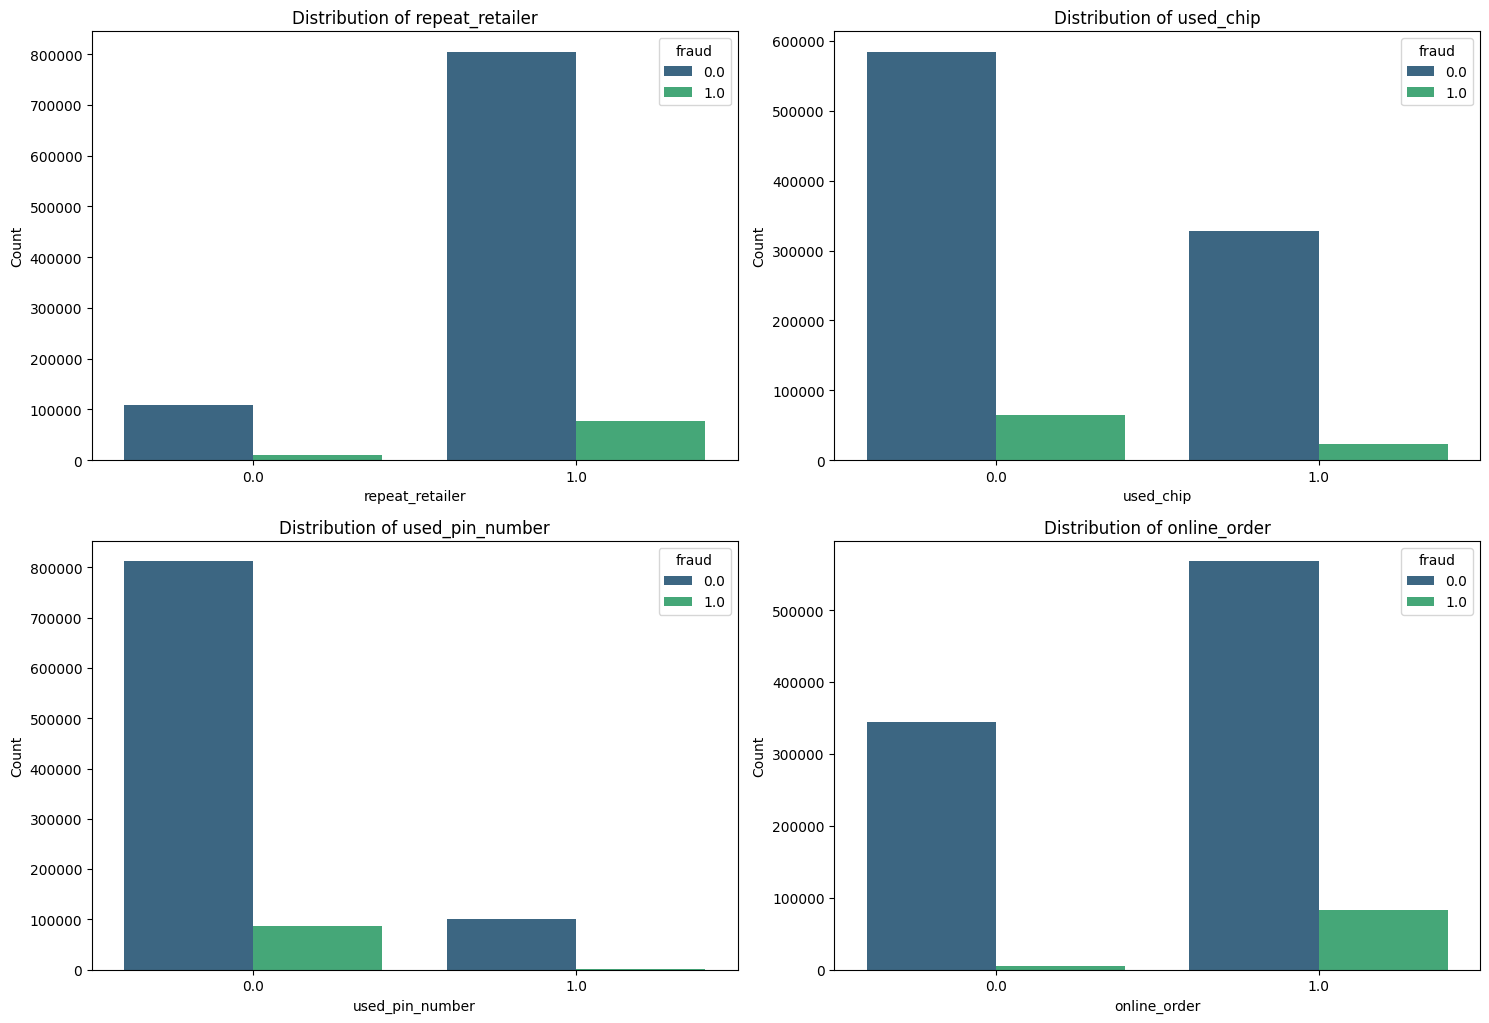

In [9]:
plt.figure(figsize=(15, 15))
binary_features = ['repeat_retailer', 'used_chip', 'used_pin_number', 'online_order']

for i, feature in enumerate(binary_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=feature, data=df,hue = 'fraud', palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

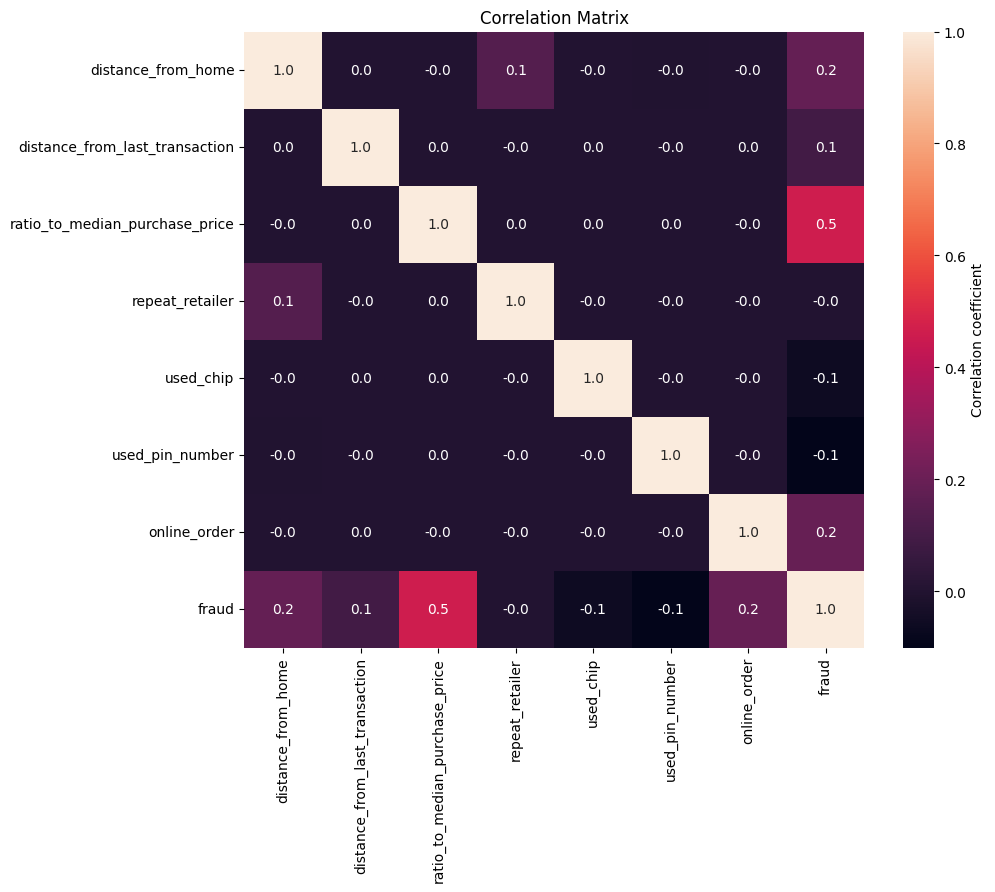

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix')
plt.show()

In [11]:
scaler = RobustScaler()
df[['distance_from_home', 
      'distance_from_last_transaction', 
      'ratio_to_median_purchase_price']] = scaler.fit_transform(df[['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']])

In [12]:
X = df.drop('fraud', axis=1)
y = df['fraud']
rus = RandomUnderSampler(random_state=42)
X_rs, y_rs = rus.fit_resample(X, y)

In [13]:
df_undersampled = pd.DataFrame(X_rs, columns=X.columns)
df_undersampled['fraud'] = y_rs
df_undersampled.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
763547,-0.086650,-0.125417,-0.567602,1.0,0.0,0.0,1.0,0.0
23634,1.007349,1.572345,0.116473,1.0,0.0,1.0,0.0,0.0
157152,-0.089277,1.085488,-0.056249,1.0,0.0,0.0,1.0,0.0
238071,-0.170928,-0.066195,-0.487964,1.0,1.0,0.0,0.0,0.0
846711,1.602001,3.250830,-0.086846,1.0,0.0,0.0,1.0,0.0


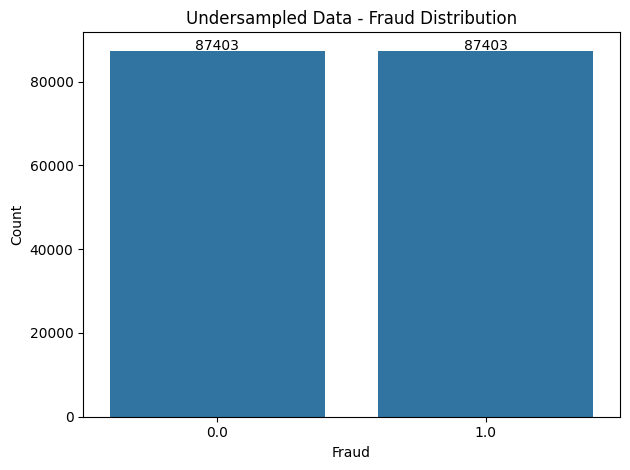

In [14]:
from collections import Counter
undersampled_counts = Counter(df_undersampled['fraud'])

sns.countplot(x='fraud', data=df_undersampled)
plt.title('Undersampled Data - Fraud Distribution')
plt.xlabel('Fraud')
plt.ylabel('Count')
for i, count in enumerate(df_undersampled['fraud'].value_counts()):
    plt.text(i, count + 50, str(count), ha='center')

plt.tight_layout()
plt.show()

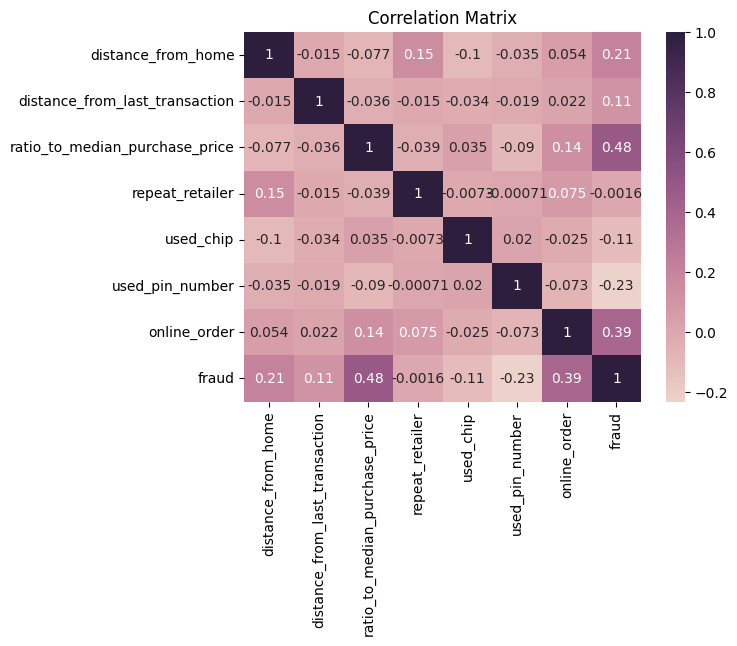

In [15]:
corr = df_undersampled.corr()
sns.heatmap(corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
plt.title('Correlation Matrix')
plt.show()


In [16]:
corr_matrix = df_undersampled.corr()

fraud_correlation = corr_matrix['fraud'].sort_values(ascending=False)
strong_correlation_features = fraud_correlation[(fraud_correlation) > 0].index.tolist()
strong_correlation_features.remove('fraud')  # Remove the target variable itself

print("Features with strong correlation to 'fraud':", strong_correlation_features)

Features with strong correlation to 'fraud': ['ratio_to_median_purchase_price', 'online_order', 'distance_from_home', 'distance_from_last_transaction']


In [17]:
strong_negative_correlation_features = fraud_correlation[fraud_correlation < -0].index.tolist()
print("Features with strong negative correlation to 'fraud':", strong_negative_correlation_features)

Features with strong negative correlation to 'fraud': ['repeat_retailer', 'used_chip', 'used_pin_number']


In [18]:
X = df_undersampled.drop('fraud', axis=1)
y = df_undersampled['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
classifiers = {
    "Support Vector Classifier": SVC()
}

In [20]:
print('Cross-Validation Scores:-')
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'{key}: {round(cv_score.mean()*100.0, 2)}')

Cross-Validation Scores:-
Support Vector Classifier: 96.14


In [21]:
params = {
    "Support Vector Classifier": {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
}


In [22]:
def randomized_search(classifier, params, n_iter=10):
    random_search = RandomizedSearchCV(classifier, params, n_iter=n_iter, cv=3, n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)
    best_classifier = random_search.best_estimator_
    return best_classifier


for key, classifier in classifiers.items():
    best_clf = randomized_search(classifier, params[key])
    print(f"Best parameters for {key}: {best_clf.get_params()}")

Best parameters for Support Vector Classifier: {'C': 0.9, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [23]:
import pickle
#SVM classifier is stored in 'classifiers' dictionary
svm_classifier = classifiers["Support Vector Classifier"]

# Save the model to a file
with open('svm_classifier.pkl', 'wb') as file:
    pickle.dump(svm_classifier, file)


In [29]:
best_params = {
    'C': 0.9, 
    'break_ties': False, 
    'cache_size': 200, 
    'class_weight': None, 
    'coef0': 0.0, 
    'decision_function_shape': 'ovr', 
    'degree': 3, 
    'gamma': 'scale', 
    'kernel': 'rbf', 
    'max_iter': -1, 
    'probability': False, 
    'random_state': None, 
    'shrinking': True, 
    'tol': 0.001, 
    'verbose': False
}

best_svc = SVC(**best_params)

In [30]:
cv_scores = cross_val_score(best_svc, X_train, y_train, cv=3)
print(f"Average Cross-Validation Score: {cv_scores.mean():.4f}")

Average Cross-Validation Score: 0.9598


In [32]:
best_svc.fit(X_train, y_train)

SVC(C=0.9)

In [33]:
y_pred = best_svc.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.9597
Precision: 0.9354
Recall: 0.9876
F1 Score: 0.9608


In [35]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.9597


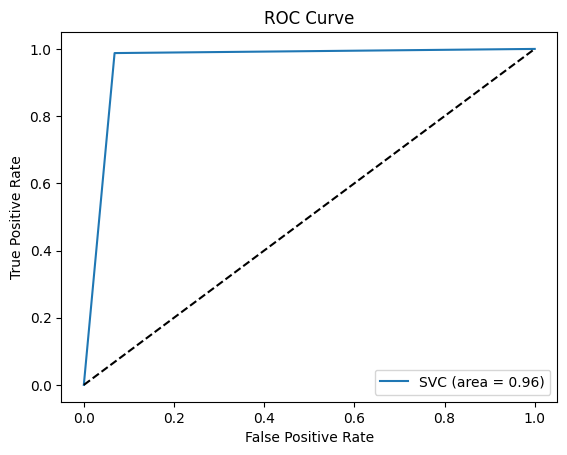

In [36]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='SVC (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
print(classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Non-Fraud       0.99      0.93      0.96     17474
       Fraud       0.94      0.99      0.96     17488

    accuracy                           0.96     34962
   macro avg       0.96      0.96      0.96     34962
weighted avg       0.96      0.96      0.96     34962



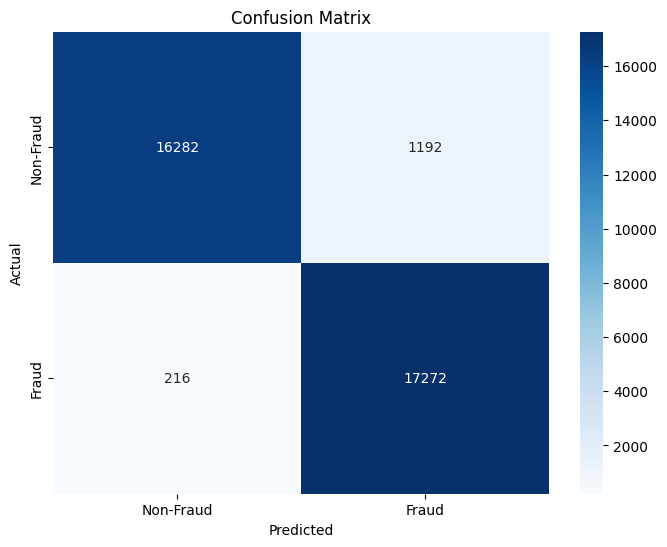

In [50]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()